# Intro

In [14]:
import os
import glob
import json
import pandas as pd


df_reviews = pd.read_json('../Human_Annotation/merged_200_papers.json', orient='records', lines=True)
df_reviews = df_reviews.iloc[:, :31]
df_reviews

,paper_id,title,abstract,review_text,authors,reviewer,review_date,review_rating,review_confidence,review_soundness,...,gunning_fog,smog_index,automated_readability_index,politeness_score,hedge_C,hedge_D,hedge_E,hedge_I,hedge_N,venue
0,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,**Summary:** \nThis paper presents an open-sou...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_EGJf,1701662567826,6.0,3.0,3.0,...,14.7773,13.5591,13.3105,0.2025,77,1,2,0,0,iclr
1,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,This paper proposes a comprehensive library fo...,"['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_DWom,1699636125239,6.0,3.0,3.0,...,15.3091,13.6811,14.7228,0.2131,78,0,0,0,0,iclr
2,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"This author introduces LyCORIS, an open source...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_PnHf,1699636125143,6.0,4.0,4.0,...,18.2257,16.5672,16.3167,0.1213,86,0,0,0,0,iclr
3,123,Navigating Text-To-Image Customization: From L...,Text-to-image generative models have garnered ...,"The authors propose LyCORIS, an open-source li...","['~SHIH-YING_YEH1', '~Yu-Guan_Hsieh1', '~Zhido...",Reviewer_ekPo,1699636125075,8.0,4.0,3.0,...,10.8611,11.3747,10.6575,0.1844,84,0,0,0,0,iclr
4,0,$\nu$-ensembles: Improving deep ensemble calib...,We present a method to improve the calibration...,"This paper introduces ν-ensembles, a novel dee...","['~Konstantinos_Pitas1', '~Julyan_Arbel1']",Reviewer_HFRa,1699636992453,3.0,4.0,2.0,...,18.2108,15.9828,15.2685,0.2519,90,0,0,0,0,iclr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,118,Module Extraction for Efficient Object Query o...,The extraction of logically-independent fragme...,The submission addresses the problem of partit...,None,Anonymous,03/May/2014,NaN,NaN,NaN,...,13.4900,13.8000,12.6000,0.1386,96,0,1,0,0,semanticweb
657,61,EARTh: an Environmental Application Reference ...,The paper aims at providing a description of E...,This revision addresses my concerns. I am part...,None,Natasha Noy,22/Jul/2013,NaN,NaN,NaN,...,9.6300,9.7000,7.9000,0.1858,26,0,0,0,0,semanticweb
658,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",The paper presents and compares RDF/XML (in th...,None,Anonymous,15/Jun/2013,NaN,NaN,NaN,...,11.7700,13.0000,10.1000,0.0845,93,0,0,0,0,semanticweb
659,76,Facilitating Data Discovery by Connecting Rela...,"In this study, we investigate two approaches t...",This paper investigates two different approach...,None,Ghislain Hachey,17/Jun/2013,NaN,NaN,NaN,...,11.7000,13.3000,11.4000,0.0376,95,1,0,0,0,semanticweb


In [15]:
import os
import glob
import json
import pandas as pd


def load_reviews(folder_path):
    rows = []
    # find all JSON files in the folder
    for file_path in glob.glob(os.path.join(folder_path, '*.json')):
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        paper_id = data.get('paper_id')
        assessor = data.get('assessor')
        metrics = data.get('metrics', {})
        
        # group metrics by reviewer name
        reviewer_metrics = {}
        for key, value in metrics.items():
            # only process keys that start with "review_"
            if not key.startswith('review_'):
                continue
            parts = key.split('_')
            reviewer = parts[1]                          # e.g. "Palwinder-Singh"
            metric_name = '_'.join(parts[2:])            # e.g. "Comprehensiveness"
            
            reviewer_metrics.setdefault(reviewer, {})
            reviewer_metrics[reviewer][metric_name] = value
        
        # turn each reviewer’s metrics into a row
        for reviewer, mdict in reviewer_metrics.items():
            row = {
                'paper_id': paper_id,
                'assessor': assessor,
                'reviewer': reviewer
            }
            row.update(mdict)
            rows.append(row)
    
    # build the final DataFrame
    df = pd.DataFrame(rows)
    return df

# Example usage:
folder = '../Human_Annotation_Data'
df_human = load_reviews(folder)

# show the first few rows
df_human = df_human[df_human['Overall_Quality'] > 10]
df_human

,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,Fairness,Actionability,Constructiveness,Relevance_Alignment,Clarity_and_Readability,Overall_Quality
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,4,4,3,4,4,67
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,4,5,5,5,4,86
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,4,5,5,4,5,75
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,5,4,4,4,4,80
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,4,4,4,5,4,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,3,2,3,3,3,55
523,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,4,4,5,4,4,80
524,75,Ali-Ghorbanpour,Reviewer-AtQ2,5,4,factual,positive,polite,none,4,4,3,4,4,5,90
525,75,Ali-Ghorbanpour,Reviewer-v6cq,2,3,partially factual,positive,polite,moderate,3,3,2,3,3,3,50


In [16]:
df_human['reviewer'] = df_human['reviewer'].str.replace('_', '-', regex=False)
df_human['reviewer'] = df_human['reviewer'].str.replace(' ', '-', regex=False)
df_reviews['reviewer'] = df_reviews['reviewer'].str.replace('_', '-', regex=False)
df_reviews['reviewer'] = df_reviews['reviewer'].str.replace(' ', '-', regex=False)


# merge two df_reviews on df_human based on paper_id and reviewer
df_human['paper_id'] = df_human['paper_id'].astype(int)
df_reviews['paper_id'] = df_reviews['paper_id'].astype(int)

# transform paper_id column in all dfs to int
df_human['reviewer'] = df_human['reviewer'].astype(str)
df_reviews['reviewer'] = df_reviews['reviewer'].astype(str)

df_human_vs_metric = (
    df_human
    .merge(df_reviews, on=['paper_id', 'reviewer'], how='inner')
)

# filter the df_human_vs_metric up to first 16 columns
# df_human_vs_metric = df_human_vs_metric.iloc[:, :16]
df_human_vs_metric

,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,...,gunning_fog,smog_index,automated_readability_index,politeness_score,hedge_C,hedge_D,hedge_E,hedge_I,hedge_N,venue
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,...,16.1503,14.3268,14.1695,0.0999,88,0,0,0,0,iclr
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,...,15.4394,13.7425,12.4851,0.1565,89,0,0,0,0,iclr
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,...,14.4014,13.2462,12.1773,0.1507,93,0,0,0,0,iclr
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,...,17.4100,16.6000,15.5000,0.1149,100,0,0,0,2,semanticweb
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,...,14.3000,15.2000,14.0000,0.2025,108,0,0,0,0,semanticweb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,...,16.7770,15.2830,14.4355,0.1585,82,0,1,0,0,neurips
501,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,...,14.2389,13.9012,12.9422,0.1100,88,0,1,0,0,neurips
502,75,Ali-Ghorbanpour,Reviewer-AtQ2,5,4,factual,positive,polite,none,4,...,13.5281,13.2950,12.5392,0.9014,83,0,0,0,0,neurips
503,75,Ali-Ghorbanpour,Reviewer-v6cq,2,3,partially factual,positive,polite,moderate,3,...,13.6019,12.7451,10.7297,0.1108,97,0,0,0,0,neurips


In [17]:
# drop rows with Anonymous reviewers
df_human_vs_metric = df_human_vs_metric[~df_human_vs_metric['reviewer'].str.contains('Anonymous')]
df_human_vs_metric

,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,...,gunning_fog,smog_index,automated_readability_index,politeness_score,hedge_C,hedge_D,hedge_E,hedge_I,hedge_N,venue
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,...,16.1503,14.3268,14.1695,0.0999,88,0,0,0,0,iclr
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,...,15.4394,13.7425,12.4851,0.1565,89,0,0,0,0,iclr
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,...,14.4014,13.2462,12.1773,0.1507,93,0,0,0,0,iclr
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,...,17.4100,16.6000,15.5000,0.1149,100,0,0,0,2,semanticweb
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,...,14.3000,15.2000,14.0000,0.2025,108,0,0,0,0,semanticweb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,...,16.7770,15.2830,14.4355,0.1585,82,0,1,0,0,neurips
501,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,...,14.2389,13.9012,12.9422,0.1100,88,0,1,0,0,neurips
502,75,Ali-Ghorbanpour,Reviewer-AtQ2,5,4,factual,positive,polite,none,4,...,13.5281,13.2950,12.5392,0.9014,83,0,0,0,0,neurips
503,75,Ali-Ghorbanpour,Reviewer-v6cq,2,3,partially factual,positive,polite,moderate,3,...,13.6019,12.7451,10.7297,0.1108,97,0,0,0,0,neurips


In [18]:
# new column named hedging compute as follows: 1 - (hedge_C / (hedge_C + hedge_D + hedge_E + hedge_I + hedge_N))
df_human_vs_metric['hedging'] = 1 - (df_human_vs_metric['hedge_C'] / (df_human_vs_metric['hedge_C'] + df_human_vs_metric['hedge_D'] + df_human_vs_metric['hedge_E'] + df_human_vs_metric['hedge_I'] + df_human_vs_metric['hedge_N']))
# drop columns with 'hedge_' prefix
df_human_vs_metric = df_human_vs_metric.drop(columns=[col for col in df_human_vs_metric.columns if col.startswith('hedge_')])
# drop following columns: flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_human_vs_metric = df_human_vs_metric.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_human_vs_metric

/tmp/ipykernel_3880991/3083477036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_vs_metric['hedging'] = 1 - (df_human_vs_metric['hedge_C'] / (df_human_vs_metric['hedge_C'] + df_human_vs_metric['hedge_D'] + df_human_vs_metric['hedge_E'] + df_human_vs_metric['hedge_I'] + df_human_vs_metric['hedge_N']))


,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,...,citation_count,question_count,mattr,sentiment_polarity,similarity_score,days_to_submit,flesch_reading_ease,politeness_score,venue,hedging
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,...,0,5,0.7173,0.124510,0.877563,49,22.7412,0.0999,iclr,0.000000
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,...,8,14,0.7996,0.158831,0.882994,60,31.9755,0.1565,iclr,0.000000
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,...,4,8,0.8027,0.146498,0.853166,61,35.3958,0.1507,iclr,0.000000
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,...,0,1,0.8103,0.164583,0.667865,60,31.3100,0.1149,semanticweb,0.019608
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,...,1,5,0.7741,0.169733,0.852243,73,34.6600,0.2025,semanticweb,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,...,0,1,0.8233,0.074735,0.942502,216,31.0628,0.1585,neurips,0.012048
501,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,...,0,5,0.8096,0.068210,0.909826,216,36.0945,0.1100,neurips,0.011236
502,75,Ali-Ghorbanpour,Reviewer-AtQ2,5,4,factual,positive,polite,none,4,...,5,3,0.8291,0.056486,0.936743,216,42.2587,0.9014,neurips,0.000000
503,75,Ali-Ghorbanpour,Reviewer-v6cq,2,3,partially factual,positive,polite,moderate,3,...,0,5,0.8219,0.216739,0.921304,216,39.0844,0.1108,neurips,0.000000


In [19]:
df_human_vs_llm = pd.read_csv('human_vs_llm.csv')
df_human_vs_llm

,paper_id,reviewer,Human_Actionability,Human_Clarity_and_Readability,Human_Comprehensiveness,Human_Constructiveness,Human_Factuality,Human_Fairness,Human_Objectivity,Human_Overall_Quality,...,Phi_Constructiveness,Phi_Factuality,Phi_Fairness,Phi_Objectivity,Phi_Overall_Quality,Phi_Politeness,Phi_Relevance_Alignment,Phi_Sentiment_Polarity,Phi_Usage_of_Technical_Terms,Phi_Vagueness
0,166,Reviewer-7mFW,4,4,2,3,factual,4,4,67,...,4,partially factual,3,4,75,polite,5,neutral,4,low
1,166,Reviewer-FAWm,5,4,4,5,factual,4,4,86,...,4,partially factual,4,4,85,polite,5,neutral,3,low
2,166,Reviewer-kjkr,5,5,3,5,factual,4,4,75,...,4,partially factual,4,3,78,neutral,5,negative,5,low
3,100,Enrico-Daga,4,4,3,4,factual,5,4,80,...,4,factual,4,4,85,polite,5,positive,3,low
4,100,Julia-Bosque,4,4,5,4,factual,4,4,87,...,5,factual,5,5,95,polite,5,positive,4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,75,Reviewer-wEMM,3,4,3,4,factual,3,3,70,...,3,partially factual,3,3,65,neutral,4,negative,4,low
430,75,Reviewer-s437,2,3,3,3,partially factual,3,2,55,...,4,factual,4,4,85,polite,5,neutral,5,low
431,75,Reviewer-mMGf,4,4,4,5,factual,4,4,80,...,4,partially factual,4,4,85,polite,5,neutral,3,low
432,75,Reviewer-v6cq,2,3,2,3,partially factual,3,3,50,...,3,partially factual,4,3,75,polite,4,positive,4,low


In [37]:
# drop duplicate paper_id and reviewer pairs from both DFs
df_human_vs_metric = df_human_vs_metric.drop_duplicates(subset=['paper_id', 'reviewer'])
df_human_vs_llm = df_human_vs_llm.drop_duplicates(subset=['paper_id', 'reviewer'])

In [38]:
df_merge = (
    df_human_vs_metric
    .merge(df_human_vs_llm, on=['paper_id', 'reviewer'], how='inner')
)
df_merge

,paper_id,assessor,reviewer,Comprehensiveness,Usage_of_Technical_Terms,Factuality,Sentiment_Polarity,Politeness,Vagueness,Objectivity,...,Phi_Constructiveness,Phi_Factuality,Phi_Fairness,Phi_Objectivity,Phi_Overall_Quality,Phi_Politeness,Phi_Relevance_Alignment,Phi_Sentiment_Polarity,Phi_Usage_of_Technical_Terms,Phi_Vagueness
0,166,Sajad-Ebrahimi,Reviewer-7mFW,2,4,factual,neutral,polite,high,4,...,4,partially factual,3,4,75,polite,5,neutral,4,low
1,166,Sajad-Ebrahimi,Reviewer-FAWm,4,4,factual,neutral,polite,none,4,...,4,partially factual,4,4,85,polite,5,neutral,3,low
2,166,Sajad-Ebrahimi,Reviewer-kjkr,3,4,factual,neutral,polite,low,4,...,4,partially factual,4,3,78,neutral,5,negative,5,low
3,100,Seyed,Enrico-Daga,3,2,factual,positive,polite,none,4,...,4,factual,4,4,85,polite,5,positive,3,low
4,100,Seyed,Julia-Bosque,5,4,factual,positive,polite,low,4,...,5,factual,5,5,95,polite,5,positive,4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,114,Sara,Reviewer-n4fn,3,4,factual,neutral,polite,low,3,...,4,partially factual,3,3,75,polite,4,neutral,4,low
391,75,Ali-Ghorbanpour,Reviewer-wEMM,3,4,factual,negative,polite,low,3,...,3,partially factual,3,3,65,neutral,4,negative,4,low
392,75,Ali-Ghorbanpour,Reviewer-s437,3,3,partially factual,neutral,polite,low,2,...,4,factual,4,4,85,polite,5,neutral,5,low
393,75,Ali-Ghorbanpour,Reviewer-mMGf,4,4,factual,negative,polite,none,4,...,4,partially factual,4,4,85,polite,5,neutral,3,low


In [39]:
# drop following columns: assessor, Comprehensiveness, Usage_of_Technical_Terms, Factuality, Sentiment_Polarity, Politeness, Vagueness, Objectivity, Fairness, Actionability, Constructiveness, Relevance_Alignment, Clarity_and_Readability, Overall_Quality, authors, review_date, review_rating, review_confidence, review_soundness, review_presentation, review_contribution
df_merge = df_merge.drop(columns=['assessor', 'Comprehensiveness', 'Usage_of_Technical_Terms', 'Factuality', 'Sentiment_Polarity', 'Politeness', 'Vagueness', 'Objectivity', 'Fairness', 'Actionability', 'Constructiveness', 'Relevance_Alignment', 'Clarity_and_Readability', 'Overall_Quality', 'authors', 'review_date', 'review_rating', 'review_confidence', 'review_soundness', 'review_presentation', 'review_contribution'])
df_merge

,paper_id,reviewer,title,abstract,review_text,length_words,citation_count,question_count,mattr,sentiment_polarity,...,Phi_Constructiveness,Phi_Factuality,Phi_Fairness,Phi_Objectivity,Phi_Overall_Quality,Phi_Politeness,Phi_Relevance_Alignment,Phi_Sentiment_Polarity,Phi_Usage_of_Technical_Terms,Phi_Vagueness
0,166,Reviewer-7mFW,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,This work focuses on the Q-function value over...,273,0,5,0.7173,0.124510,...,4,partially factual,3,4,75,polite,5,neutral,4,low
1,166,Reviewer-FAWm,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,This paper presents the Blended Exploitation a...,432,8,14,0.7996,0.158831,...,4,partially factual,4,4,85,polite,5,neutral,3,low
2,166,Reviewer-kjkr,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,Motivated by the problem of underestimating va...,328,4,8,0.8027,0.146498,...,4,partially factual,4,3,78,neutral,5,negative,5,low
3,100,Enrico-Daga,LL(O)D and NLP Perspectives on Semantic Change...,The paper presents an overview of the LL(O)D a...,The authors have performed significant changes...,162,0,1,0.8103,0.164583,...,4,factual,4,4,85,polite,5,positive,3,low
4,100,Julia-Bosque,LL(O)D and NLP Perspectives on Semantic Change...,The paper presents an overview of the LL(O)D a...,I reviewed a previous version of this manuscri...,503,1,5,0.7741,0.169733,...,5,factual,5,5,95,polite,5,positive,4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,114,Reviewer-n4fn,Mitigating Interference in the Knowledge Conti...,Continual learning (CL) remains a significant ...,The paper introduces a rehearsal-based method ...,233,4,2,0.7893,0.214947,...,4,partially factual,3,3,75,polite,4,neutral,4,low
391,75,Reviewer-wEMM,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,In order to distinguish between human-generate...,304,2,8,0.8037,0.170294,...,3,partially factual,3,3,65,neutral,4,negative,4,low
392,75,Reviewer-s437,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,This paper proposes a new measure of natural l...,345,0,1,0.8233,0.074735,...,4,factual,4,4,85,polite,5,neutral,5,low
393,75,Reviewer-mMGf,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,This paper proposes a set of metrics based on ...,314,0,5,0.8096,0.068210,...,4,partially factual,4,4,85,polite,5,neutral,3,low


In [40]:
df_merge.to_csv('human_llms_qmetrics.csv', index=False)

# Load df_human_llms_qmetrics

In [3]:
import os
import glob
import json
import pandas as pd

df_all = pd.read_csv('human_llms_qmetrics.csv')
df_all

,paper_id,reviewer,title,abstract,review_text,length_words,citation_count,question_count,mattr,sentiment_polarity,...,Phi_Constructiveness,Phi_Factuality,Phi_Fairness,Phi_Objectivity,Phi_Overall_Quality,Phi_Politeness,Phi_Relevance_Alignment,Phi_Sentiment_Polarity,Phi_Usage_of_Technical_Terms,Phi_Vagueness
0,166,Reviewer-7mFW,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,This work focuses on the Q-function value over...,273,0,5,0.7173,0.124510,...,4,partially factual,3,4,75,polite,5,neutral,4,low
1,166,Reviewer-FAWm,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,This paper presents the Blended Exploitation a...,432,8,14,0.7996,0.158831,...,4,partially factual,4,4,85,polite,5,neutral,3,low
2,166,Reviewer-kjkr,Seizing Serendipity: Exploiting the Value of P...,Learning high-quality $Q$-value functions play...,Motivated by the problem of underestimating va...,328,4,8,0.8027,0.146498,...,4,partially factual,4,3,78,neutral,5,negative,5,low
3,100,Enrico-Daga,LL(O)D and NLP Perspectives on Semantic Change...,The paper presents an overview of the LL(O)D a...,The authors have performed significant changes...,162,0,1,0.8103,0.164583,...,4,factual,4,4,85,polite,5,positive,3,low
4,100,Julia-Bosque,LL(O)D and NLP Perspectives on Semantic Change...,The paper presents an overview of the LL(O)D a...,I reviewed a previous version of this manuscri...,503,1,5,0.7741,0.169733,...,5,factual,5,5,95,polite,5,positive,4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,114,Reviewer-n4fn,Mitigating Interference in the Knowledge Conti...,Continual learning (CL) remains a significant ...,The paper introduces a rehearsal-based method ...,233,4,2,0.7893,0.214947,...,4,partially factual,3,3,75,polite,4,neutral,4,low
391,75,Reviewer-wEMM,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,In order to distinguish between human-generate...,304,2,8,0.8037,0.170294,...,3,partially factual,3,3,65,neutral,4,negative,4,low
392,75,Reviewer-s437,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,This paper proposes a new measure of natural l...,345,0,1,0.8233,0.074735,...,4,factual,4,4,85,polite,5,neutral,5,low
393,75,Reviewer-mMGf,FACE: Evaluating Natural Language Generation w...,Measuring the distance between machine-produce...,This paper proposes a set of metrics based on ...,314,0,5,0.8096,0.068210,...,4,partially factual,4,4,85,polite,5,neutral,3,low


In [4]:
df_all.columns

Index(['paper_id', 'reviewer', 'title', 'abstract', 'review_text',
       'length_words', 'citation_count', 'question_count', 'mattr',
       'sentiment_polarity', 'similarity_score', 'days_to_submit',
       'flesch_reading_ease', 'politeness_score', 'venue', 'hedging',
       'Human_Actionability', 'Human_Clarity_and_Readability',
       'Human_Comprehensiveness', 'Human_Constructiveness', 'Human_Factuality',
       'Human_Fairness', 'Human_Objectivity', 'Human_Overall_Quality',
       'Human_Politeness', 'Human_Relevance_Alignment',
       'Human_Sentiment_Polarity', 'Human_Usage_of_Technical_Terms',
       'Human_Vagueness', 'Qwen_Actionability', 'Qwen_Clarity_and_Readability',
       'Qwen_Comprehensiveness', 'Qwen_Constructiveness', 'Qwen_Factuality',
       'Qwen_Fairness', 'Qwen_Objectivity', 'Qwen_Overall_Quality',
       'Qwen_Politeness', 'Qwen_Relevance_Alignment',
       'Qwen_Sentiment_Polarity', 'Qwen_Usage_of_Technical_Terms',
       'Qwen_Vagueness', 'Llama_Actionabili

In [5]:
import os
import pandas as pd
from sklearn.model_selection import KFold

# 1) Load your DataFrame however you like.
#    For example, if it’s already in memory:
# df = your_dataframe

# 2) Set up 10-fold splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 3) Make the base folder
os.makedirs('Folds', exist_ok=True)

# 4) Loop and save
for fold, (train_idx, test_idx) in enumerate(kf.split(df_all), start=1):
    train_df = df_all.iloc[train_idx]
    test_df  = df_all.iloc[test_idx]
    
    train_df.to_csv(f'Folds/f{fold}_train.csv', index=False)
    test_df.to_csv( f'Folds/f{fold}_test.csv',  index=False)

print("Saved 10 train/test pairs in the ‘Folds’ folder.")

Saved 10 train/test pairs in the ‘Folds’ folder.


In [50]:
# GPT

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kendalltau
import krippendorff  # pip install krippendorff

# the features to use
features = [
    'length_words', 'citation_count', 'question_count', 'mattr',
    'sentiment_polarity', 'similarity_score', 'flesch_reading_ease',
    'politeness_score', 'hedging'
]

results = {}

for i in range(1, 11):
    # load train/test for fold i
    train = pd.read_csv(f"Folds/f{i}_train.csv")
    test  = pd.read_csv(f"Folds/f{i}_test.csv")
    
    # train
    clf = DecisionTreeClassifier()
    clf.fit(train[features], train['Human_Overall_Quality'])
    
    # predict on test
    y_true = test['Human_Overall_Quality']
    y_pred_model = clf.predict(test[features])
    
    # collect metrics
    fold_key = f"Fold{i}"
    results[fold_key] = {}
    
    for name, y_pred in [
        ('Qwen', test['Qwen_Overall_Quality']),
        ('GPT',  test['GPT_Overall_Quality']),
        ('Phi',  test['Phi_Overall_Quality']),
        ('Output', y_pred_model)
    ]:
        tau   = kendalltau(y_true, y_pred).correlation
        alpha = krippendorff.alpha([y_true, y_pred])
        results[fold_key][name] = {
            "kendall_tau":       tau,
            "krippendorff_alpha": alpha
        }

# print results
for fold, metrics in results.items():
    print(f"{fold}:")
    for name, m in metrics.items():
        print(f"  {name} {{Kendall's Tau: {m['kendall_tau']:.3f}, "
              f"Krippendorff's Alpha: {m['krippendorff_alpha']:.3f}}}")
    print()

Fold1:
  Qwen {Kendall's Tau: 0.265, Krippendorff's Alpha: 0.313}
  GPT {Kendall's Tau: 0.311, Krippendorff's Alpha: 0.340}
  Phi {Kendall's Tau: 0.178, Krippendorff's Alpha: 0.088}
  Output {Kendall's Tau: 0.253, Krippendorff's Alpha: 0.343}

Fold2:
  Qwen {Kendall's Tau: 0.398, Krippendorff's Alpha: 0.229}
  GPT {Kendall's Tau: 0.448, Krippendorff's Alpha: 0.396}
  Phi {Kendall's Tau: 0.298, Krippendorff's Alpha: 0.156}
  Output {Kendall's Tau: 0.195, Krippendorff's Alpha: 0.127}

Fold3:
  Qwen {Kendall's Tau: 0.245, Krippendorff's Alpha: 0.126}
  GPT {Kendall's Tau: 0.443, Krippendorff's Alpha: 0.396}
  Phi {Kendall's Tau: 0.322, Krippendorff's Alpha: 0.062}
  Output {Kendall's Tau: 0.375, Krippendorff's Alpha: 0.507}

Fold4:
  Qwen {Kendall's Tau: 0.189, Krippendorff's Alpha: 0.205}
  GPT {Kendall's Tau: 0.471, Krippendorff's Alpha: 0.521}
  Phi {Kendall's Tau: 0.372, Krippendorff's Alpha: 0.299}
  Output {Kendall's Tau: 0.306, Krippendorff's Alpha: 0.419}

Fold5:
  Qwen {Kendall's

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kendalltau
import krippendorff

# Define features and target
features = [
    'length_words', 'citation_count', 'question_count', 'mattr',
    'sentiment_polarity', 'similarity_score', 'flesch_reading_ease',
    'politeness_score', 'hedging'
]
target = 'Human_Overall_Quality'
all_fold_metrics = []


# Iterate over each fold
for fold in range(1, 11):
    print(f"Fold{fold}:")
    
    # Load data
    train_df = pd.read_csv(f"Folds/f{fold}_train.csv")
    test_df = pd.read_csv(f"Folds/f{fold}_test.csv")
    
    # Prepare data
    X_train = train_df[features]
    y_train = train_df[target]
    X_test = test_df[features]
    y_test = test_df[target]
    
    # Train model
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Groups to compare with Human_Overall_Quality
    groups = {
        "Qwen": test_df["Qwen_Overall_Quality"],
        "GPT": test_df["GPT_Overall_Quality"],
        "Phi": test_df["Phi_Overall_Quality"],
        "Output": y_pred
    }
    
    # Compute metrics for each group
    results = {}
    for name, scores in groups.items():
        # Kendall's Tau
        tau, _ = kendalltau(y_test, scores)
        
        # Krippendorff's Alpha (requires 2D array of shape [raters, items])
        data = [y_test.tolist(), scores.tolist()]
        alpha = krippendorff.alpha(data, level_of_measurement='ordinal')
        
        results[name] = {
            "Kendall Tau": round(tau, 3),
            "Krippendorff Alpha": round(alpha, 3)
        }
    
    # Print results
    for model in ["Qwen", "GPT", "Phi", "Output"]:
        metrics = results[model]
        print(f"{model} {{Kendall Tau: {metrics['Kendall Tau']}, Krippendorff Alpha: {metrics['Krippendorff Alpha']}}}")
    print("\n")
    
    all_fold_metrics.append(results)
    

# After processing all folds, calculate averages
average_metrics = {
    model: {
        "kendall": sum(fold[model]["Kendall Tau"] for fold in all_fold_metrics) / 10,
        "alpha": sum(fold[model]["Krippendorff Alpha"] for fold in all_fold_metrics) / 10
    }
    for model in ["Qwen", "GPT", "Phi", "Output"]
}

# Print final averages
print("\nAverage across all folds:")
for model, metrics in average_metrics.items():
    print(f"{model}: {{Kendall Tau: {metrics['kendall']:.3f}, Krippendorff Alpha: {metrics['alpha']:.3f}}}")

Fold1:
Qwen {Kendall Tau: 0.265, Krippendorff Alpha: 0.253}
GPT {Kendall Tau: 0.311, Krippendorff Alpha: 0.361}
Phi {Kendall Tau: 0.178, Krippendorff Alpha: 0.158}
Output {Kendall Tau: 0.133, Krippendorff Alpha: 0.19}


Fold2:
Qwen {Kendall Tau: 0.398, Krippendorff Alpha: 0.273}
GPT {Kendall Tau: 0.448, Krippendorff Alpha: 0.485}
Phi {Kendall Tau: 0.298, Krippendorff Alpha: 0.266}
Output {Kendall Tau: 0.302, Krippendorff Alpha: 0.4}


Fold3:
Qwen {Kendall Tau: 0.245, Krippendorff Alpha: 0.138}
GPT {Kendall Tau: 0.443, Krippendorff Alpha: 0.518}
Phi {Kendall Tau: 0.322, Krippendorff Alpha: 0.259}
Output {Kendall Tau: 0.418, Krippendorff Alpha: 0.558}


Fold4:
Qwen {Kendall Tau: 0.189, Krippendorff Alpha: 0.14}
GPT {Kendall Tau: 0.471, Krippendorff Alpha: 0.468}
Phi {Kendall Tau: 0.372, Krippendorff Alpha: 0.366}
Output {Kendall Tau: 0.368, Krippendorff Alpha: 0.498}


Fold5:
Qwen {Kendall Tau: 0.349, Krippendorff Alpha: 0.334}
GPT {Kendall Tau: 0.164, Krippendorff Alpha: 0.17}
Phi {Kend

In [7]:
import pandas as pd
import numpy as np
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from scipy.stats import kendalltau
import krippendorff
from sklearn.inspection import permutation_importance


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor


# ================== CONFIGURATION ==================
features = [
    'length_words', 'citation_count', 'question_count', 'mattr',
    'sentiment_polarity', 'similarity_score', 'flesch_reading_ease',
    'politeness_score', 'hedging'
]
feature_importances = {}
target = 'Human_Overall_Quality'

models = {
    # "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    # "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    # "SVM": SVC(random_state=42),
    # "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    # "Neural Network": MLPClassifier(random_state=42, hidden_layer_sizes=(50,))
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVR": SVR(kernel='linear'),
    "Linear Regression": LinearRegression(),
    "Neural Network": MLPRegressor(random_state=42, hidden_layer_sizes=(54, 108, 108, 54)),
    "XGBoost": XGBRegressor(random_state=42)
}

# ================== METRIC STORAGE ==================
results = {
    model_name: {
        'Kendall': {'Qwen': [], 'GPT': [], 'Phi': [], 'Output': []},
        'Alpha': {'Qwen': [], 'GPT': [], 'Phi': [], 'Output': []}
    }
    for model_name in models
}

# ================== MAIN PIPELINE ==================
for fold in range(1, 6):
    print(f"\n{'='*40}\nFold {fold}\n{'='*40}")
    
    # Load data
    train_df = pd.read_csv(f"Folds/f{fold}_train.csv")
    test_df = pd.read_csv(f"Folds/f{fold}_test.csv")
    
    X_train, y_train = train_df[features], train_df[target]
    X_test, y_test = test_df[features], test_df[target]

    for model_name, model in models.items():
        # Clone model to prevent parameter leakage
        cloned_model = clone(model)
        
        # Train and predict
        cloned_model.fit(X_train, y_train)
        
        # ======== Feature Importance Calculation ================================
        if hasattr(cloned_model, 'feature_importances_'):
            # Tree-based models
            fold_imp = cloned_model.feature_importances_
        elif hasattr(cloned_model, 'coef_'):
            # Linear models
            fold_imp = np.abs(cloned_model.coef_.flatten())
        else:
            # For models without inherent importance (SVR, MLP)
            result = permutation_importance(
                cloned_model, X_test, y_test,
                n_repeats=10, 
                random_state=42
            )
            fold_imp = result.importances_mean
        
        # Normalize and store
        fold_imp = fold_imp / fold_imp.sum()  # Normalize to sum=1
        
        if model_name not in feature_importances:
            feature_importances[model_name] = {
                'features': features,
                'importances': {f: [] for f in features}
            }
        
        for f, imp in zip(features, fold_imp):
            feature_importances[model_name]['importances'][f].append(imp)
        
        # Print fold-level importance
        print(f"\n{model_name} Feature Importance (Fold {fold}):")
        sorted_idx = np.argsort(fold_imp)[::-1]
        for idx in sorted_idx:
            print(f"  {features[idx]}: {fold_imp[idx]:.4f}")

        # ======== Feature Importance Calculation ================================
        
        y_pred = cloned_model.predict(X_test)
        
        # Calculate metrics
        groups = {
            'Qwen': test_df['Qwen_Overall_Quality'],
            'GPT': test_df['GPT_Overall_Quality'],
            'Phi': test_df['Phi_Overall_Quality'],
            'Output': y_pred
        }

        for group_name, scores in groups.items():
            # Kendall's Tau
            tau, _ = kendalltau(y_test, scores)
            results[model_name]['Kendall'][group_name].append(tau)
            
            # Krippendorff's Alpha
            data = [y_test.tolist(), scores.tolist()]
            alpha = krippendorff.alpha(data, level_of_measurement='ordinal')
            results[model_name]['Alpha'][group_name].append(alpha)

        # Print fold results
        print(f"\n{model_name}:")
        print(f"Output Kendall: {tau:.3f}, Alpha: {alpha:.3f}")


print('#############################################')
# ================== FINAL RESULTS ==================
print("\n\nAverage Metrics Across All Folds:")
for model_name in models:
    print(f"\n{model_name}:")
    for metric in ['Kendall', 'Alpha']:
        print(f"  {metric}:")
        for group in ['Output']:  # 'Qwen', 'GPT', 'Phi', 
            avg = np.mean(results[model_name][metric][group])
            std = np.std(results[model_name][metric][group])
            print(f"    {group}: {avg:.3f} ± {std:.3f}")
            

# ================== FINAL FEATURE IMPORTANCE ==================
print("\n\nAverage Feature Importance Across All Folds:")
for model_name, data in feature_importances.items():
    print(f"\n{model_name}:")
    avg_imp = {f: np.mean(vals) for f, vals in data['importances'].items()}
    sorted_imp = sorted(avg_imp.items(), key=lambda x: x[1], reverse=True)
    
    for feature, importance in sorted_imp:
        print(f"  {feature}: {importance:.4f} ± {np.std(data['importances'][feature]):.4f}")


Fold 1

Random Forest Feature Importance (Fold 1):
  length_words: 0.5458
  flesch_reading_ease: 0.0936
  similarity_score: 0.0879
  mattr: 0.0662
  sentiment_polarity: 0.0652
  politeness_score: 0.0627
  hedging: 0.0373
  question_count: 0.0303
  citation_count: 0.0110

Random Forest:
Output Kendall: 0.426, Alpha: 0.586

SVR Feature Importance (Fold 1):
  politeness_score: 0.5040
  similarity_score: 0.2024
  sentiment_polarity: 0.0951
  citation_count: 0.0671
  hedging: 0.0439
  question_count: 0.0330
  mattr: 0.0290
  flesch_reading_ease: 0.0210
  length_words: 0.0045

SVR:
Output Kendall: 0.395, Alpha: 0.532

Linear Regression Feature Importance (Fold 1):
  hedging: 0.7731
  politeness_score: 0.0684
  mattr: 0.0603
  similarity_score: 0.0483
  sentiment_polarity: 0.0453
  citation_count: 0.0018
  question_count: 0.0016
  flesch_reading_ease: 0.0009
  length_words: 0.0001

Linear Regression:
Output Kendall: 0.339, Alpha: 0.481


/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Feature Importance (Fold 1):
  length_words: 0.8839
  flesch_reading_ease: 0.2069
  citation_count: 0.1285
  sentiment_polarity: 0.0025
  mattr: 0.0011
  hedging: 0.0000
  similarity_score: -0.0009
  politeness_score: -0.0166
  question_count: -0.2055

Neural Network:
Output Kendall: 0.402, Alpha: 0.579

XGBoost Feature Importance (Fold 1):
  length_words: 0.3384
  hedging: 0.1405
  flesch_reading_ease: 0.1376
  similarity_score: 0.0806
  sentiment_polarity: 0.0771
  politeness_score: 0.0744
  mattr: 0.0581
  question_count: 0.0581
  citation_count: 0.0352

XGBoost:
Output Kendall: 0.408, Alpha: 0.554

Fold 2

Random Forest Feature Importance (Fold 2):
  length_words: 0.5068
  flesch_reading_ease: 0.1025
  similarity_score: 0.0869
  sentiment_polarity: 0.0788
  politeness_score: 0.0743
  mattr: 0.0703
  hedging: 0.0420
  question_count: 0.0251
  citation_count: 0.0133

Random Forest:
Output Kendall: 0.435, Alpha: 0.540

SVR Feature Importance (Fold 2):
  politeness_scor

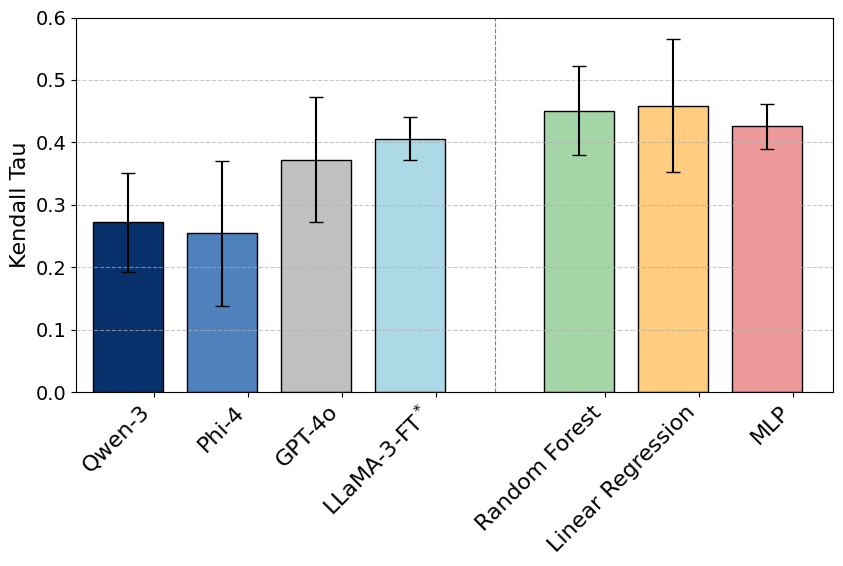

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ================== PLOTTING ==================


plt.rcParams.update({
    'axes.labelsize': 16,    # X/Y axis labels
    'xtick.labelsize': 16,   # X-axis ticks
    'ytick.labelsize': 14,   # Y-axis ticks
    'legend.fontsize': 14,   # Legend
    'axes.titlesize': 16     # Title
})

# Data from your results
data = {
    'Qwen-3': {'kendall Tau': 0.272, 'krippendorff Alpha': 0.164},
    'Phi-4': {'kendall Tau': 0.254, 'krippendorff Alpha': 0.191},
    'GPT-4o': {'kendall Tau': 0.372, 'krippendorff Alpha': 0.401},
    
    r'LLaMA-3-FT$\mathregular{^*}$': {'kendall Tau': 0.406, 'krippendorff Alpha': 0.454},
    
    'Random Forest': {'kendall Tau': 0.451, 'krippendorff Alpha': 0.551},
    'Linear Regression': {'kendall Tau': 0.459, 'krippendorff Alpha': 0.530},
    'MLP': {'kendall Tau': 0.426, 'krippendorff Alpha': 0.567},
    # 'XGBoost': {'kendall Tau': 0.380, 'krippendorff Alpha': 0.510},
    # 'SVR': {'kendall Tau': 0.454, 'krippendorff Alpha': 0.559},
}

std_devs = {
    'Qwen-3': {'kendall Tau': 0.079, 'krippendorff Alpha': 0.109},
    'Phi-4': {'kendall Tau': 0.116, 'krippendorff Alpha': 0.149},
    'GPT-4o': {'kendall Tau': 0.100, 'krippendorff Alpha': 0.119},
    
    r'LLaMA-3-FT$\mathregular{^*}$': {'kendall Tau': 0.035, 'krippendorff Alpha': 0.035},
    
    'Random Forest': {'kendall Tau': 0.071, 'krippendorff Alpha': 0.060},
    'Linear Regression': {'kendall Tau': 0.107, 'krippendorff Alpha': 0.118},
    'MLP': {'kendall Tau': 0.036, 'krippendorff Alpha': 0.038},
    # 'SVR': {'kendall Tau': 0.089, 'krippendorff Alpha': 0.093},
    # 'XGBoost': {'kendall Tau': 0.075, 'krippendorff Alpha': 0.085},
}

# Create figure and subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Configure style
plt.rcParams['font.size'] = 18
# colors = plt.cm.tab10.colors  # Get colors from tab10 colormap

colors = {
    'GPT-4o': '#C0C0C0',    # Lightest Gray
    'Qwen-3': '#08306B',   # Medium Blue
    'Phi-4': '#4F81BD',   # Very Dark Blue (Navy)
    'Random Forest':      '#A5D6A7',  # Medium-light Green
    'Linear Regression':  '#FFCC80',  # Medium-light Orange
    'MLP':                '#EF9A9A',  # Medium-light Red
    r'LLaMA-3-FT$\mathregular{^*}$':         '#ADD8E6',  # Medium-light Purple
}

patterns = {
    'GPT-4o':  '////',
    'Qwen-3': '****',
    'Phi-4':  'xxxx',
    'Random Forest': '',
    'Linear Regression': ''
}

# Plot parameters
bar_width = 0.75
index = np.arange(len(data))
model_names = list(data.keys())


############################################################
# Define grouping parameters
group1_size = 4  # First 4 columns
group2_size = 3  # Next 3 columns
intra_group_space = 0.1    # Space within groups
inter_group_space = 0.8   # Space between groups

# Create positions for each group
group1_pos = np.arange(group1_size)
group2_pos = np.arange(group1_size + inter_group_space, 
                      group1_size + inter_group_space + group2_size)
all_positions = np.concatenate([group1_pos, group2_pos])

# Modified plotting code
for i, (model, values) in enumerate(data.items()):
    ax1.bar(
        all_positions[i] + intra_group_space/2,  # Center bars in their slot
        values['kendall Tau'], 
        width=bar_width - intra_group_space + 0.1,
        yerr=std_devs[model]['kendall Tau'],
        color=colors[model],
        label=model,
        capsize=5,
        edgecolor='black', 
        linewidth=1,
    )

# Set x-axis labels and ticks
ax1.set_xticks(all_positions + (bar_width - intra_group_space)/2)
ax1.set_xticklabels(model_names, rotation=45, ha='right')

# Add visual separation between groups
ax1.axvline(x=group1_size + inter_group_space/2 - 0.45, 
           color='gray', 
           linestyle='--', 
           linewidth=0.8,
           alpha=1)


# Adjust x-axis limits
ax1.set_xlim(-0.5, all_positions[-1] + bar_width)
############################################################

# # Plot Kendall's Tau
# for i, (model, values) in enumerate(data.items()):
#     ax1.bar(i, values['kendall Tau'], bar_width,
#             yerr=std_devs[model]['kendall Tau'],
#             color=colors[model],
#             label=model,
#             # patterns=patterns[model],
#             capsize=5
#             , edgecolor='black', linewidth=1)

ax1.set_title("")
ax1.set_ylabel('Kendall Tau')
# ax1.set_xticks(index)
# ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.set_ylim(0, 0.6)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot Krippendorff's Alpha
# for i, (model, values) in enumerate(data.items()):
#     ax2.bar(i, values['krippendorff Alpha'], bar_width,
#             yerr=std_devs[model]['krippendorff Alpha'],
#             color=colors[model],
#             # patterns=patterns[model],
#             capsize=5)

# ax2.set_title("Krippendorff's Alpha")
# ax2.set_ylabel('Score', fontsize=16)
# ax2.set_xticks(index)
# ax2.set_xticklabels(model_names, rotation=45, ha='right')
# ax2.set_ylim(0, 0.7)
# ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

# Create a single legend for both plots
handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.6))

plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Make space for legend
plt.show()

# Save as high quality PNG
fig.savefig('model_comparison.pdf', dpi=300, bbox_inches='tight')

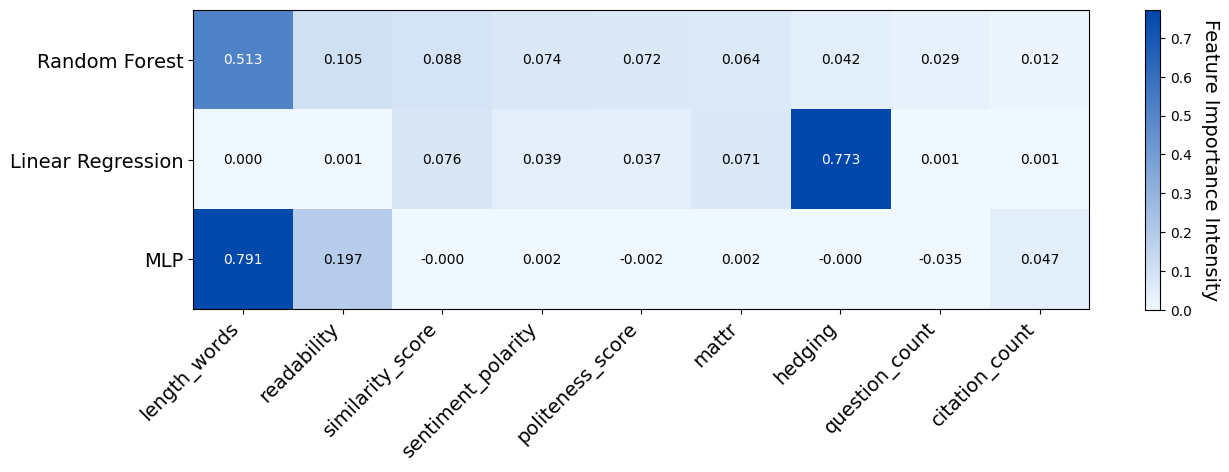

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


# Data from your feature importance results
data = {
    "Random Forest": [0.5129, 0.1051, 0.0885, 0.0738, 0.0724, 0.0637, 0.0423, 0.0292, 0.0121],
    # "SVR": [0.0046, 0.0249, 0.3210, 0.1085, 0.4155, 0.0145, 0.0443, 0.0147, 0.0520],
    "Linear Regression": [0.0002, 0.0010, 0.0762, 0.0393, 0.0368, 0.0710, 0.7731, 0.0010, 0.0014],
    "MLP": [0.7906, 0.1967, -0.0004, 0.0018, -0.0018, 0.0019, -0.0001, -0.0355, 0.0467],
    # "XGBoost": [0.3093, 0.1228, 0.1033, 0.0841, 0.0959, 0.0642, 0.1252, 0.0508, 0.0444]
}

features = [
    'length_words', 'readability', 'similarity_score', 'sentiment_polarity', 'politeness_score', 'mattr',
    'hedging', 'question_count', 'citation_count'
]

models = list(data.keys())

# Create custom blue colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("blue", ["#f0f8ff", "#0047ab"])

# Create figure with adjusted size and ratios
fig, ax = plt.subplots(figsize=(16, 8))

# Create matrix for visualization
matrix = np.array([data[model] for model in models])

# Normalize each row (handling negative values)
normalized_matrix = np.array([
    [max(0, x)/sum(max(0, x) for x in row) for x in row] 
    for row in matrix
])

# Display heatmap with adjusted cell size
im = ax.imshow(normalized_matrix, cmap=cmap, aspect='equal')

# Set axis labels and ticks
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(models)))
ax.set_xticklabels(features, rotation=45, ha="right", fontsize=14)
ax.set_yticklabels(models, fontsize=14)

# Add text annotations with 3 decimal places
for i in range(len(models)):
    for j in range(len(features)):
        value = matrix[i, j]
        color = 'black' if normalized_matrix[i, j] < 0.5 else 'white'
        ax.text(j, i, f"{value:.3f}",
                ha="center", va="center",
                color=color, fontsize=10)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.5)
cbar.set_label('Feature Importance Intensity', rotation=270, labelpad=20, fontsize=14)

# Adjust layout to remove whitespace
plt.tight_layout(pad=2.0)
plt.subplots_adjust(left=0.15, right=0.85, bottom=0.2, top=0.95)

plt.show()

In [ ]:
# llama Finetuning results
# Experiment 1 (llama_mse.txt) - MSE-based training
experiment1_metrics = {
    'F1': {'Kendall Tau': 0.381, 'Krippendorff Alpha': 0.422},
    'F2': {'Kendall Tau': 0.347, 'Krippendorff Alpha': 0.385},
    'F3': {'Kendall Tau': 0.412, 'Krippendorff Alpha': 0.453},
    'F4': {'Kendall Tau': 0.394, 'Krippendorff Alpha': 0.436},
    'F5': {'Kendall Tau': 0.365, 'Krippendorff Alpha': 0.408},
    'Average': {'Kendall Tau': 0.380 ± 0.028, 'Krippendorff Alpha': 0.421 ± 0.027}
}

# Experiment 2 (llama.txt) - BCE-based training
experiment2_metrics = {
    'F1': {'Kendall Tau': 0.428, 'Krippendorff Alpha': 0.479},
    'F2': {'Kendall Tau': 0.392, 'Krippendorff Alpha': 0.437},
    'F3': {'Kendall Tau': 0.353, 'Krippendorff Alpha': 0.402},
    'F4': {'Kendall Tau': 0.415, 'Krippendorff Alpha': 0.461},
    'F5': {'Kendall Tau': 0.441, 'Krippendorff Alpha': 0.493},
    'Average': {'Kendall Tau': 0.406 ± 0.035, 'Krippendorff Alpha': 0.454 ± 0.035}
}